# stock1_chart
## 概要
* yahoo financeより株価データを取得する
* 調整済み終値を折れ線グラフ化する
* 5日,25日,50日単純移動平均を作成し、グラフ化する
* 出来高を棒グラフ化する
## 参考
### キノコード：株価のデータ分析(1)
* https://youtu.be/0-fZ47QudYo
* https://kino-code.com/python_automation_stock_analysis/
### install packages
* pip install pandas_datareader
* pip install yfinance

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.core.common.is_list_like = pd.api.types.is_list_like

In [2]:
# 日経平均データ(^N225)の取得
ticker = '^N225'
start = '2019-06-01'
end = '2020-06-01'

yf.pdr_override()
df = pdr.get_data_yahoo(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-03,20327.869141,20438.029297,20305.740234,20410.880859,20410.880859,67400000
2019-06-04,20435.859375,20464.570312,20289.640625,20408.539062,20408.539062,69200000
2019-06-05,20667.890625,20800.640625,20646.150391,20776.099609,20776.099609,72300000


In [4]:
date=df.index
price=df['Adj Close']

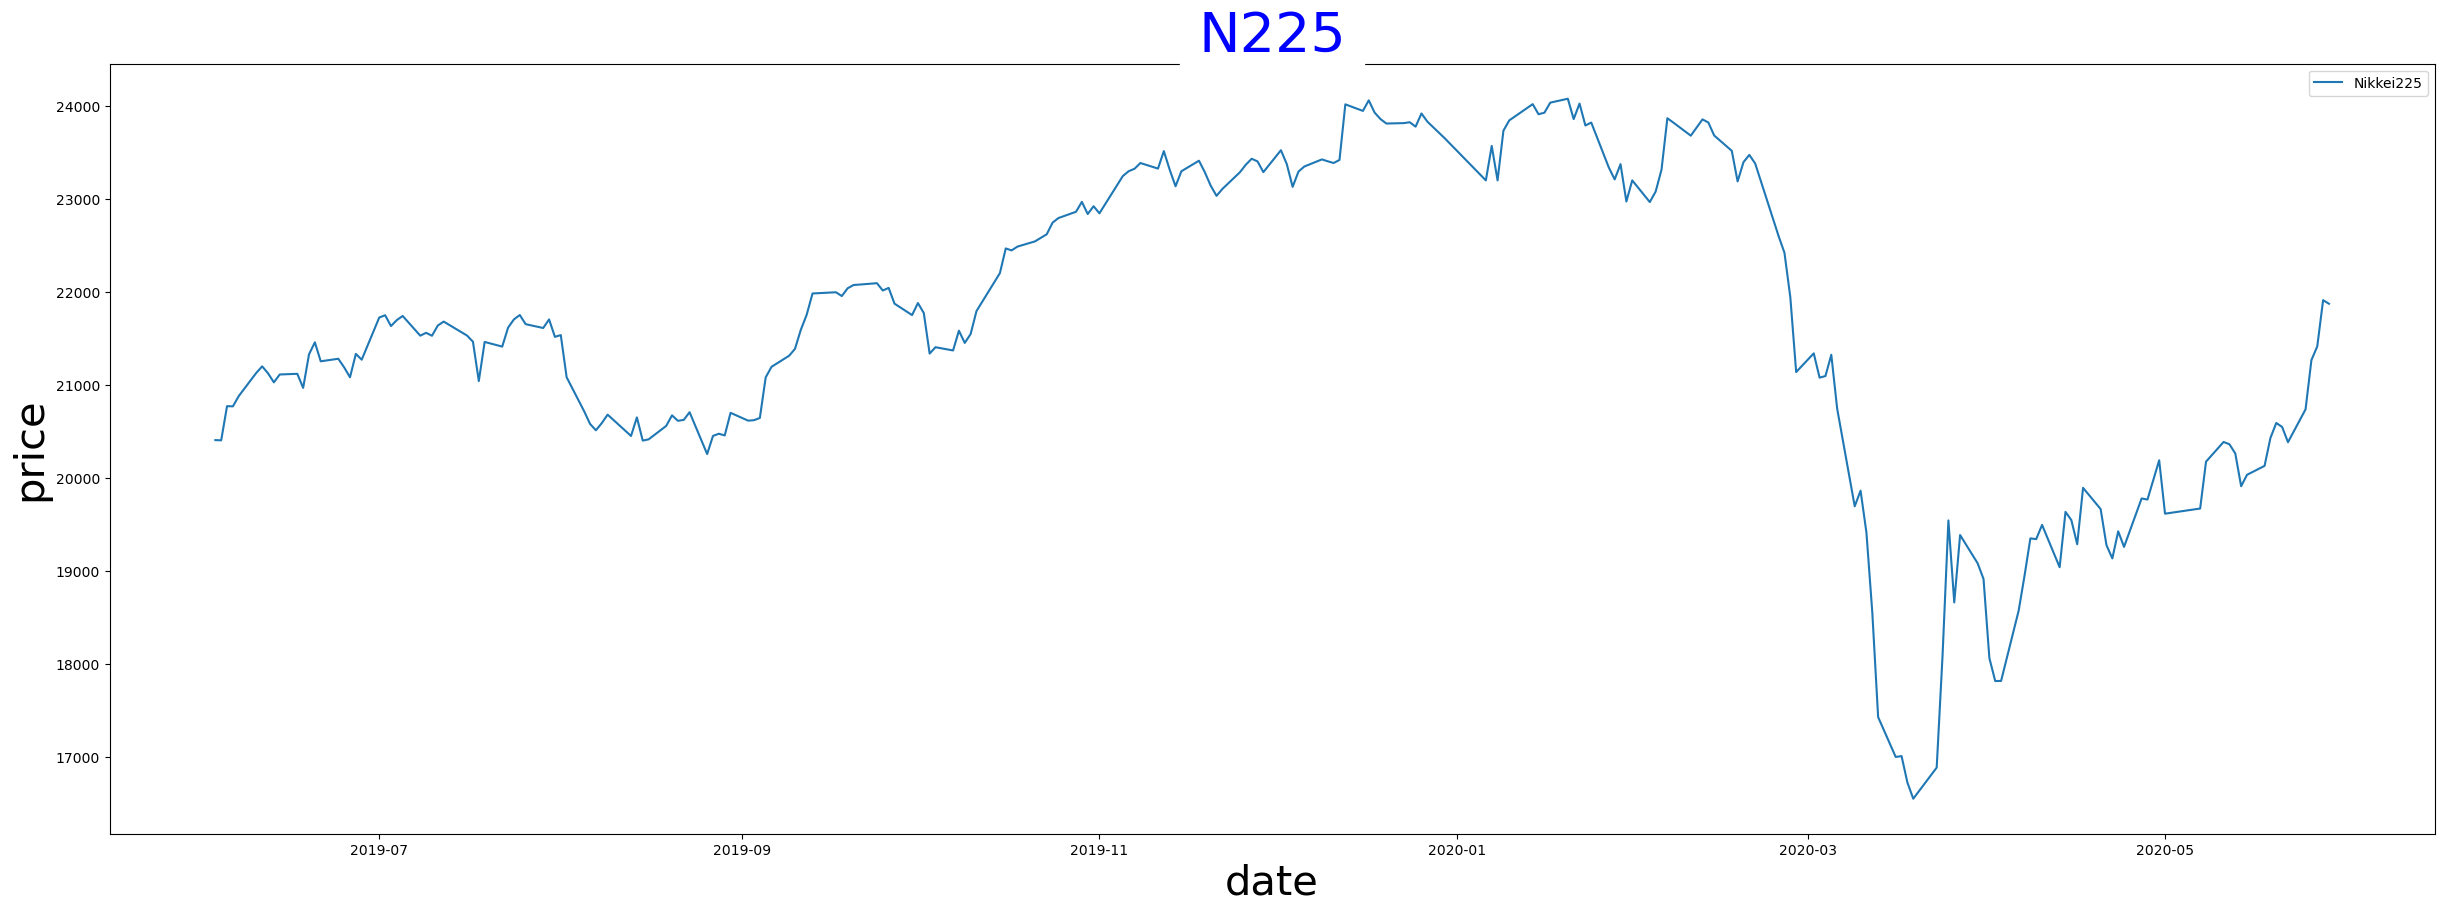

In [5]:
# グラフによる可視化
plt.figure(figsize=(30, 10))
plt.plot(date,price,label='Nikkei225')
plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.xlabel('date',color='black',size=30)
plt.ylabel('price',color='black',size=30)
plt.legend()

In [6]:
# 移動平均
span01=5
span02=25
span03=50

df['sma01'] = price.rolling(window=span01).mean()
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()

In [7]:
pd.set_option('display.max_rows', None)
df.head(100)

,Open,High,Low,Close,Adj Close,Volume,sma01,sma02,sma03
Date,,,,,,,,,
2019-06-03,20327.869141,20438.029297,20305.740234,20410.880859,20410.880859,67400000,NaN,NaN,NaN
2019-06-04,20435.859375,20464.570312,20289.640625,20408.539062,20408.539062,69200000,NaN,NaN,NaN
2019-06-05,20667.890625,20800.640625,20646.150391,20776.099609,20776.099609,72300000,NaN,NaN,NaN
2019-06-06,20745.839844,20842.279297,20745.839844,20774.039062,20774.039062,59600000,NaN,NaN,NaN
2019-06-07,20859.779297,20907.769531,20816.580078,20884.710938,20884.710938,50700000,20650.853906,NaN,NaN
2019-06-10,21095.400391,21166.119141,21077.949219,21134.419922,21134.419922,58200000,20795.561719,NaN,NaN
2019-06-11,21099.539062,21227.179688,21066.619141,21204.279297,21204.279297,52100000,20954.709766,NaN,NaN
2019-06-12,21130.390625,21259.699219,21118.750000,21129.720703,21129.720703,56500000,21025.433984,NaN,NaN
2019-06-13,21040.910156,21111.230469,20932.130859,21032.000000,21032.000000,65700000,21077.026172,NaN,NaN


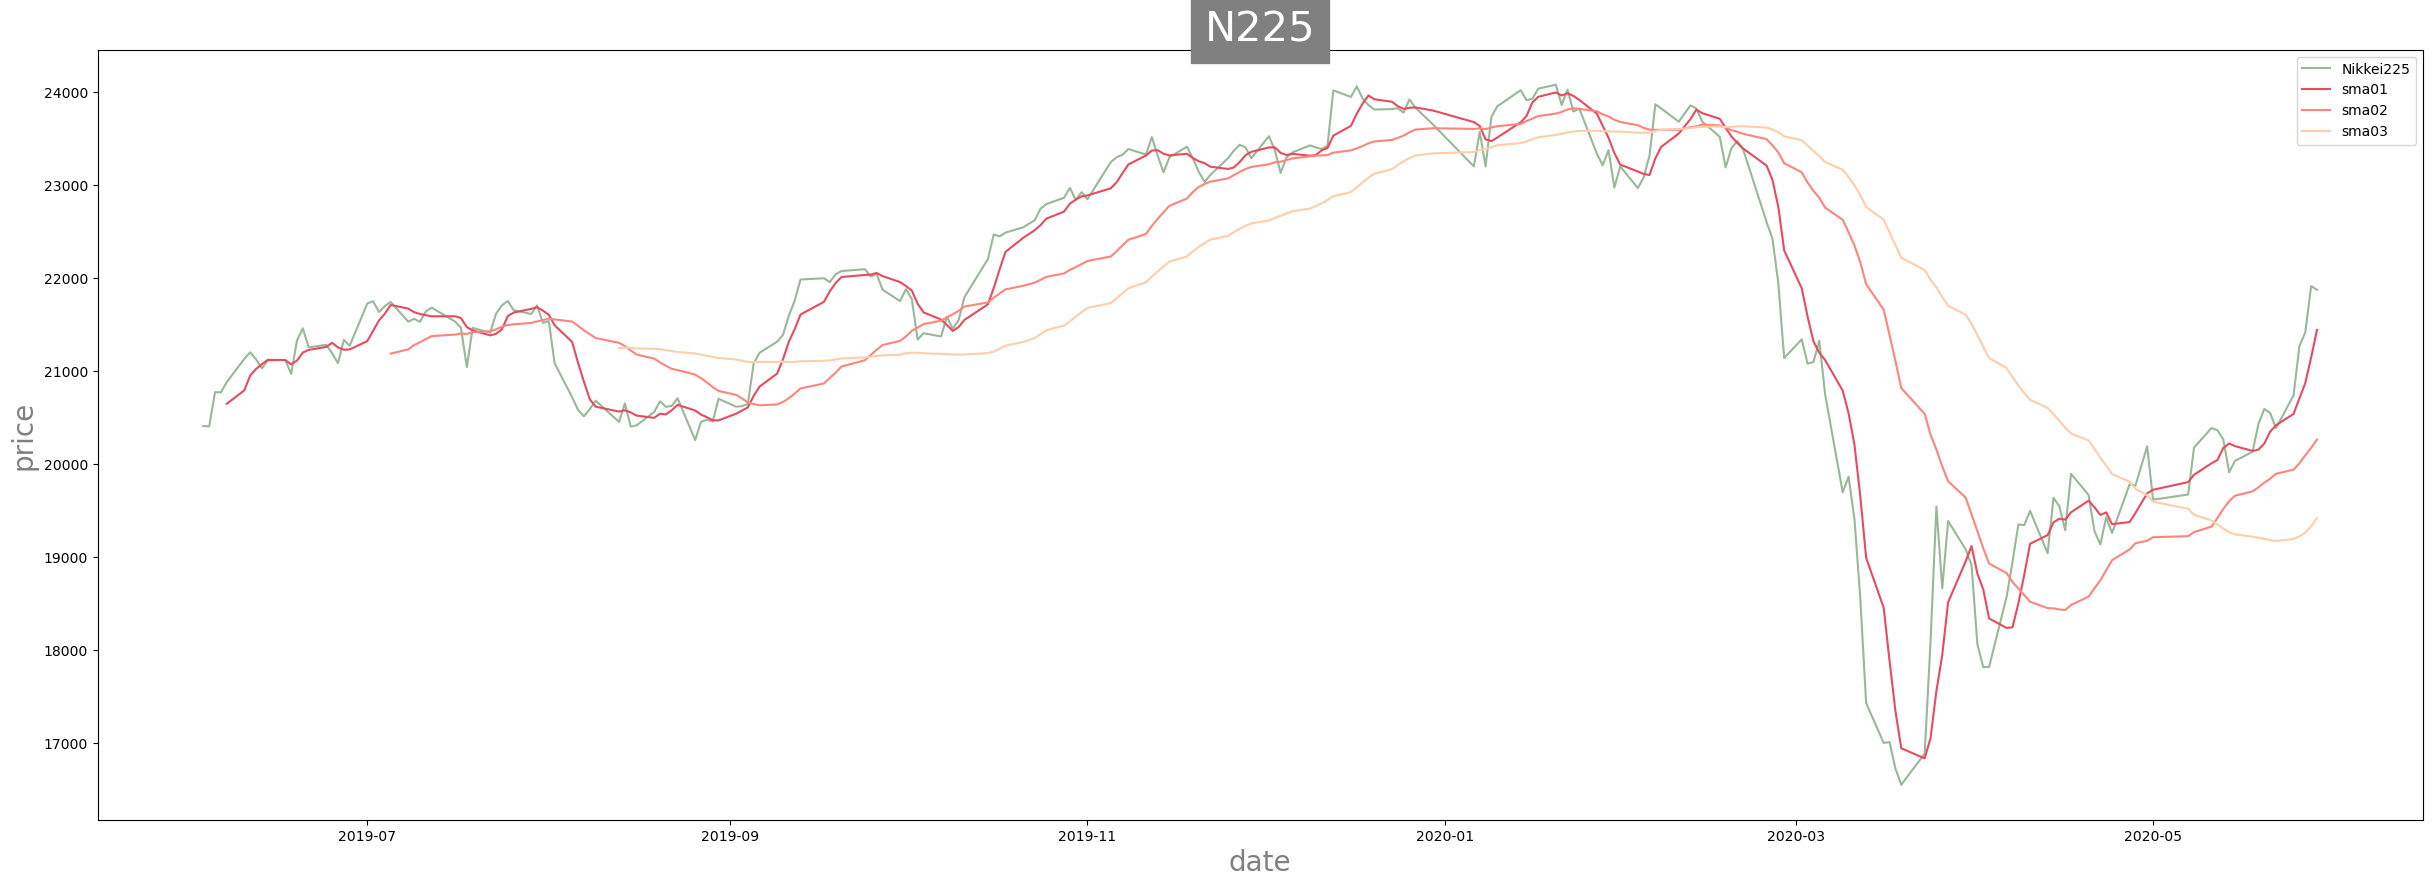

In [8]:
plt.figure(figsize=(30, 10))
plt.plot(date,price,label='Nikkei225',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')

plt.title('N225',color='white',backgroundcolor='grey',size=30,loc='center')
plt.xlabel('date',color='grey',size=20)
plt.ylabel('price',color='grey',size=20)

plt.legend()

### ゴールデンクロス
* 短期の移動平均線が中期以上の移動平均線を下から上に抜けること
* 価格が上昇するトレンドであることを示す
### デッドクロス
* 短期の移動平均線が中期以上の移動平均線を上から下に抜けること
* 価格が下降するトレンドであることを示す

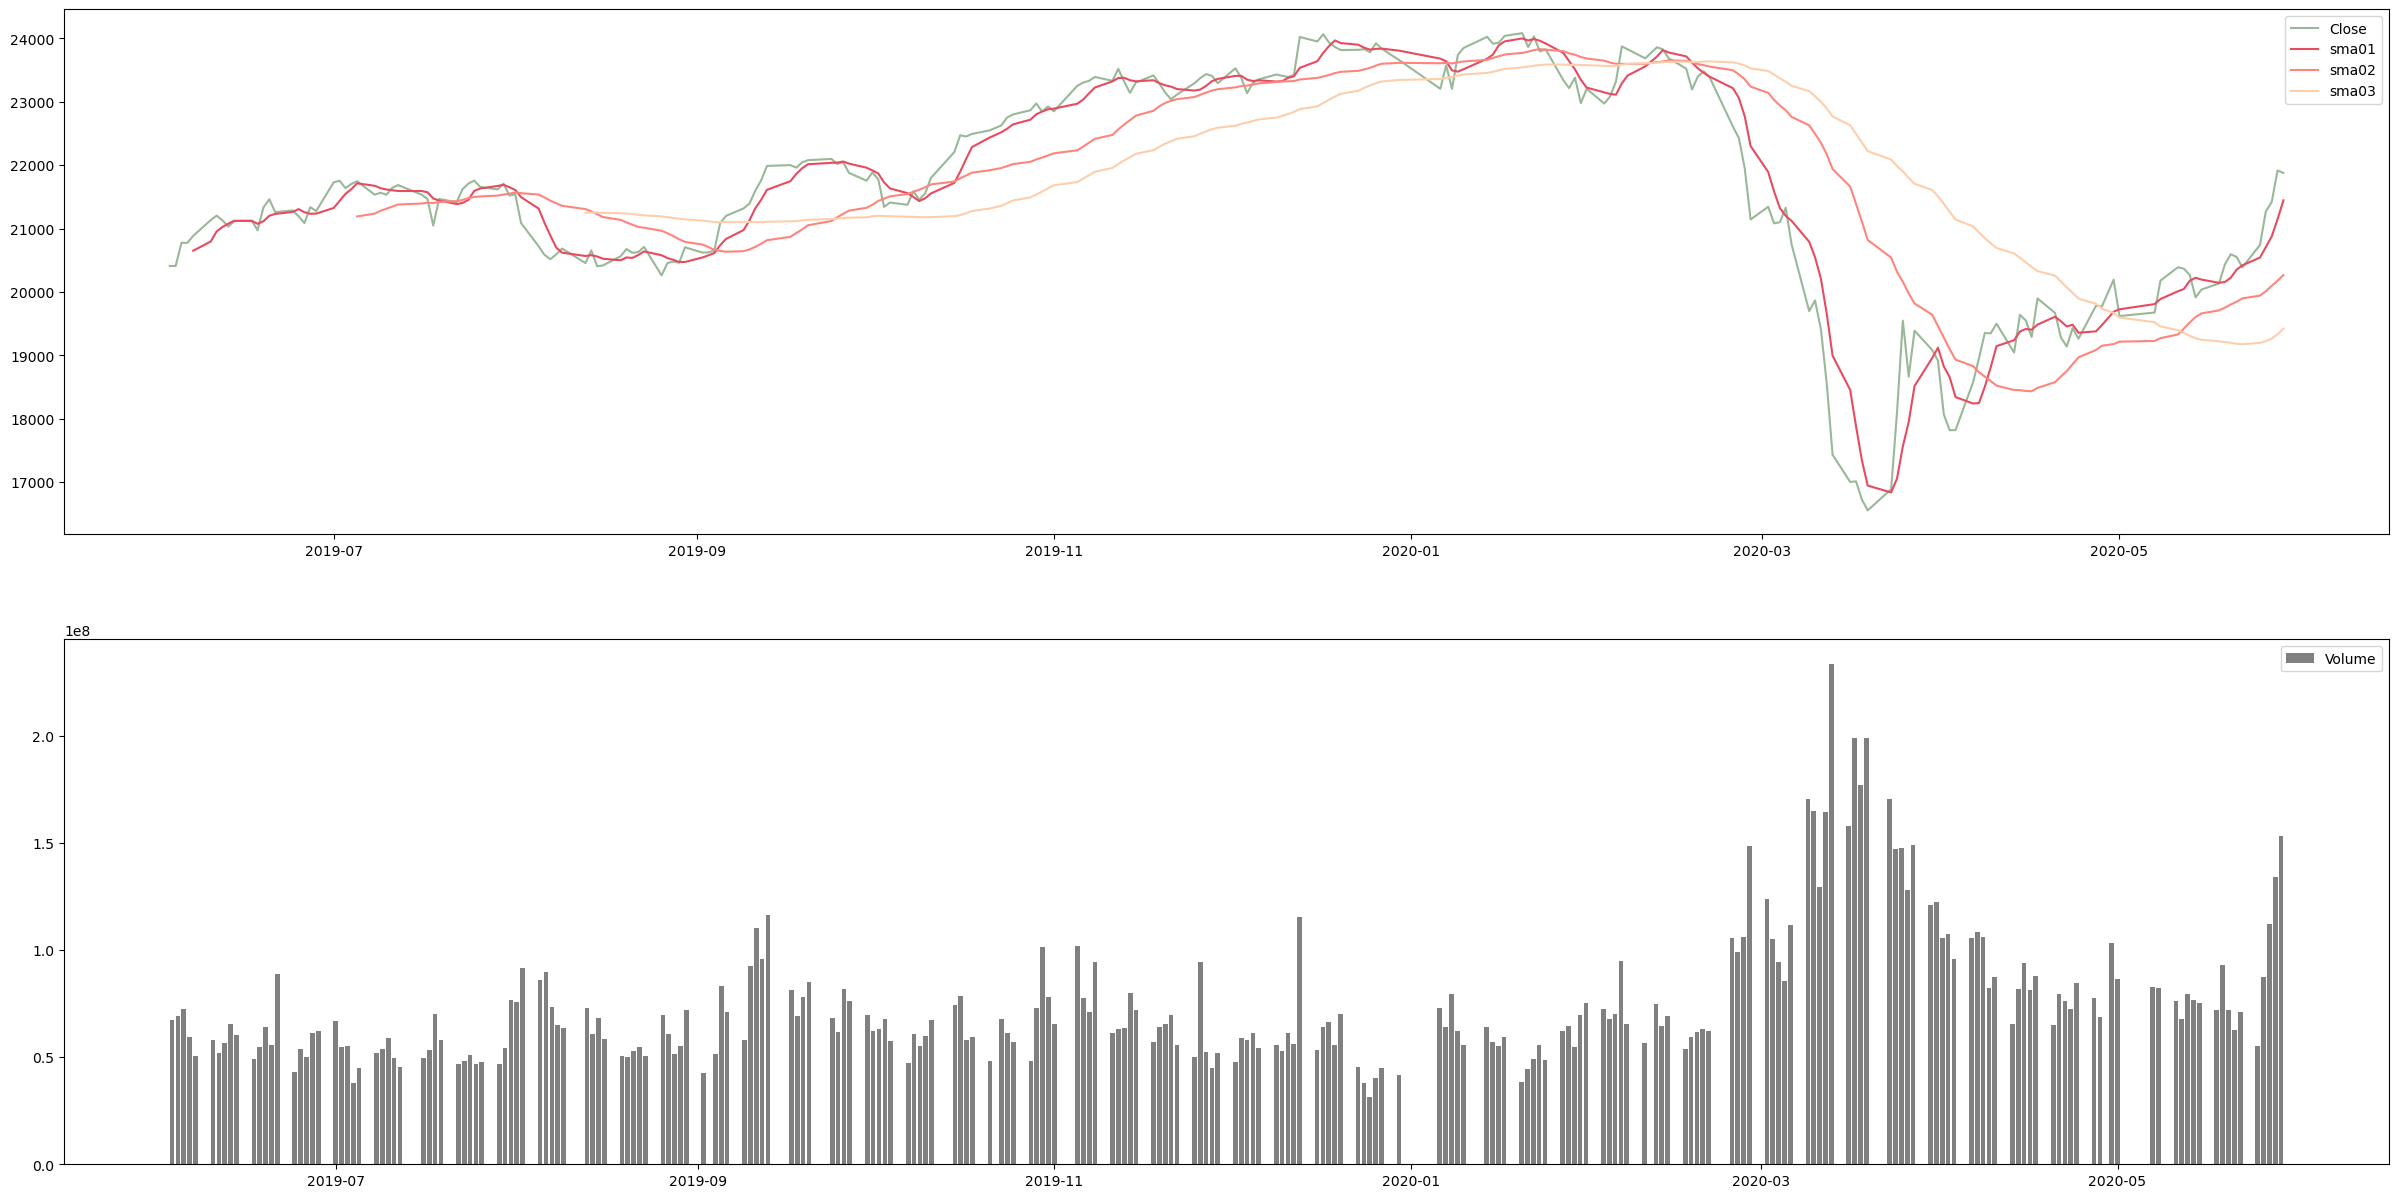

In [9]:
# 出来高（Volume）
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date,price,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()